# Credit Card Fraud Detection using Logistic Regression #

Nick Alexander

The purpose of this project is to predict credit card fraud using Logistic Regression. The objective is to maximize the F1 Score for the out of sample data. The out of sample data is defined as a hold out set of 20% of the total data set. The data set is the anonymized credit card fraud data obtained from Kaggle at the following location.

The notebook is organized as follows:

__Exploratory Data Analysis__

__Learning Curve Analysis__

__Feature Selection Analysis__

__Over and Undersampling Analysis__

__Out of Sample Test__

__Conclusion__

https://www.kaggle.com/mlg-ulb/creditcardfraud

In [20]:
%run Fraud_Imports.ipynb
%run Fraud_Classes.ipynb
%run Fraud_Functions.ipynb

In [21]:
raw_data = pd.read_csv(r"C:\Users\Nick Alexander\Documents\Quant\Data\creditcard_fraud.csv")
data = credit_fraud(raw_data)

## Exploratory Data Analysis ##

In [3]:
data.check_duplicates()

The dimensions of the original data set is (284807, 31)
The dimensions of the data set with duplicates dropped is (283726, 31)


This check demonstrates we have just over 1000 rows of duplicate data. These columns will now be removed.

In [87]:
data.remove_duplicates()

The dimensions of the data set after the duplicates have been removed is (283726, 31)


This operation confirms the duplicates have been removed.

The dimensions of the raw data are (283726, 31)
The head of the raw data is as follows:


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0




The null cases and type of each column are as follows:


<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
time      283726 non-null float64
v1        283726 non-null float64
v2        283726 non-null float64
v3        283726 non-null float64
v4        283726 non-null float64
v5        283726 non-null float64
v6        283726 non-null float64
v7        283726 non-null float64
v8        283726 non-null float64
v9        283726 non-null float64
v10       283726 non-null float64
v11       283726 non-null float64
v12       283726 non-null float64
v13       283726 non-null float64
v14       283726 non-null float64
v15       283726 non-null float64
v16       283726 non-null float64
v17       283726 non-null float64
v18       283726 non-null float64
v19       283726 non-null float64
v20       283726 non-null float64
v21       283726 non-null float64
v22       283726 non-null float64
v23       283726 non-null float64
v24       2837

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,...,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726
mean,94811.1,0.00591715,-0.00413476,0.00161312,-0.00296631,0.00182756,-0.00113949,0.00180069,-0.000854453,-0.0015962,...,-0.000370593,-1.50276e-05,0.000198171,0.000214207,-0.000232387,0.000149441,0.00176303,0.000547312,88.4727,0.0016671
std,47481,1.94803,1.6467,1.50868,1.41418,1.37701,1.33193,1.22766,1.17905,1.09549,...,0.723909,0.72455,0.623702,0.605627,0.52122,0.482053,0.395744,0.328027,250.399,0.0407962
min,0,-56.4075,-72.7157,-48.3256,-5.68317,-113.743,-26.1605,-43.5572,-73.2167,-13.4341,...,-34.8304,-10.9331,-44.8077,-2.83663,-10.2954,-2.60455,-22.5657,-15.4301,0,0
25%,54204.8,-0.915951,-0.600321,-0.889682,-0.850134,-0.68983,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.5427,-0.161703,-0.354453,-0.317485,-0.326763,-0.0706408,-0.052818,5.6,0
50%,84692.5,0.0203841,0.0639492,0.179963,-0.022248,-0.0534676,-0.275168,0.0408595,0.0218979,-0.0525957,...,-0.0294406,0.0066749,-0.0111586,0.0410157,0.0162784,-0.0521716,0.00147859,0.0112876,22,0
75%,139298,1.31607,0.800283,1.02696,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.0912082,0.0782761,77.51,0
max,172792,2.45493,22.0577,9.38256,16.8753,34.8017,73.3016,120.589,20.0072,15.595,...,27.2028,10.5031,22.5284,4.58455,7.51959,3.51735,31.6122,33.8478,25691.2,1




The standard deviation and range of each feature is as follows


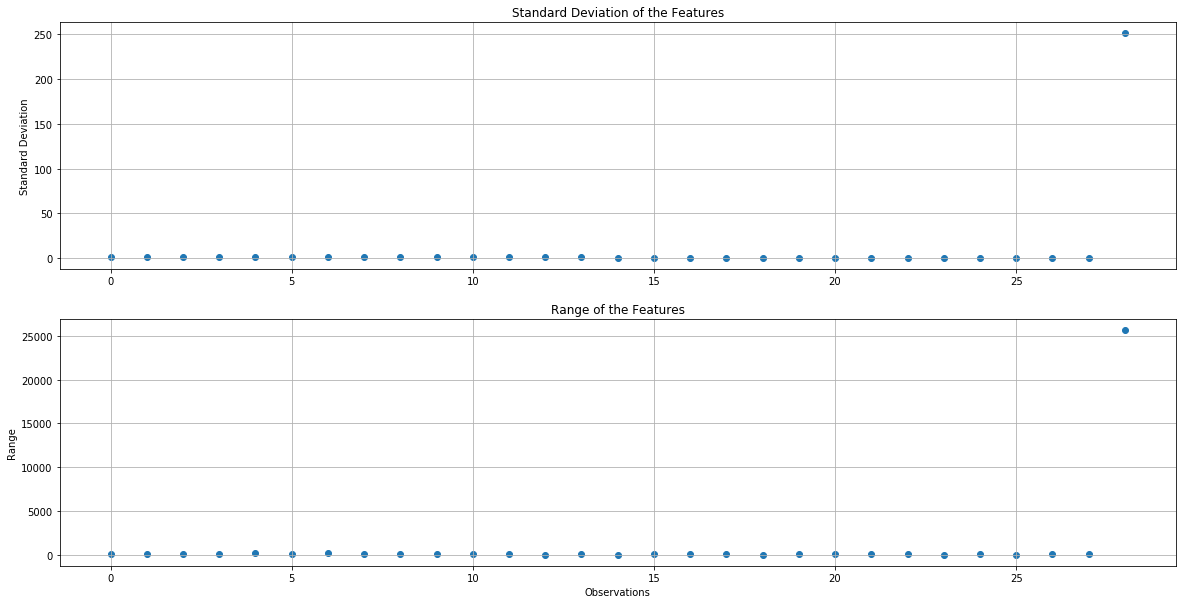

In [88]:
data.visualize()

We have 29 predictor variables, 28 PCA features and 1 variable for amount the fraudulent charge was for. The target variable is class, or whether this transaction was a fraud or not. The predictor variables are all floats with no missing data. While the descriptive statistics are helpful, we want to better understand the variability of each predictor, the relationship among all variability of all the predictors and not just a snap shot. Therefore, standard deviation and range are plotted for all the predictors. Here we can see V1-V28 behave similarly with amount being the clear outlier.

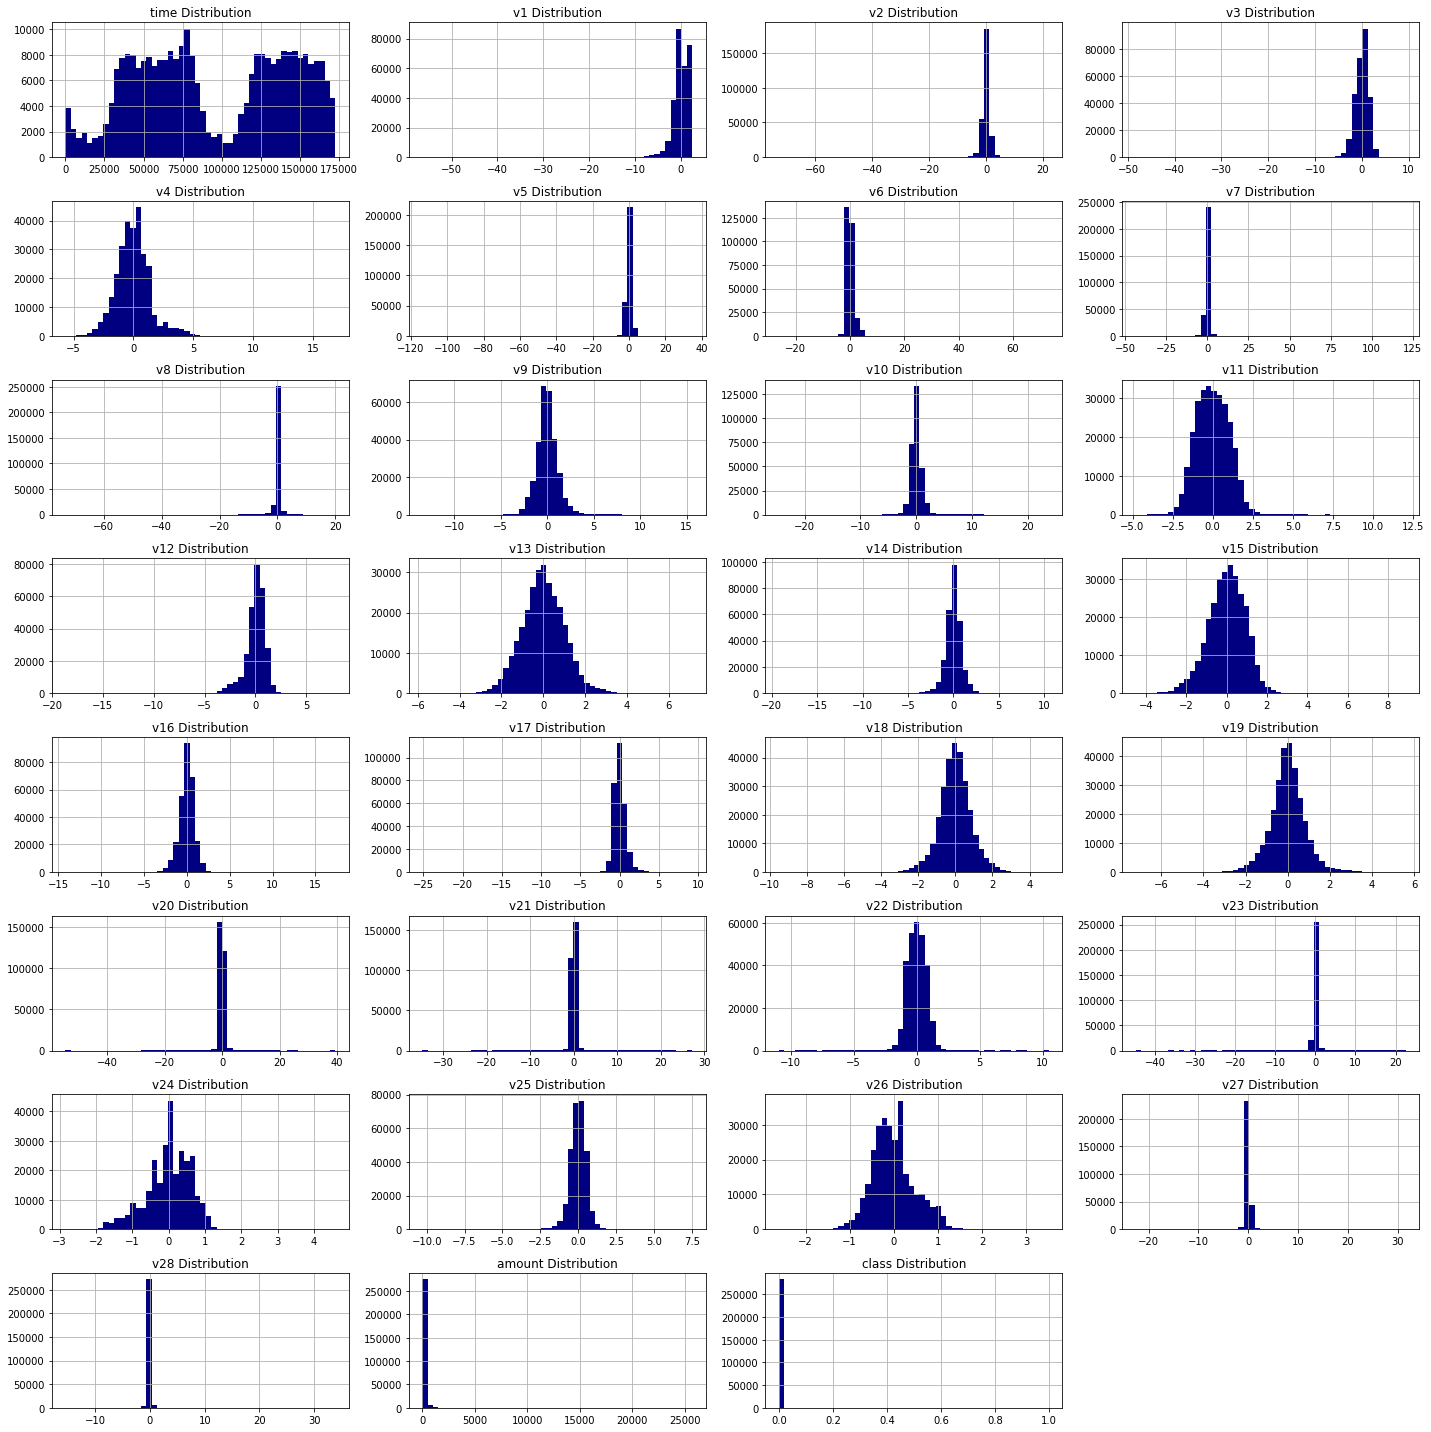

In [16]:
data.plot_histograms(size=20,rows=8,cols=4,num_bins=50,scale='linear')

This linear scale is not quite as informative as we hoped. This is likley due to outliers, therefore, I will investigate the log scale histogram.

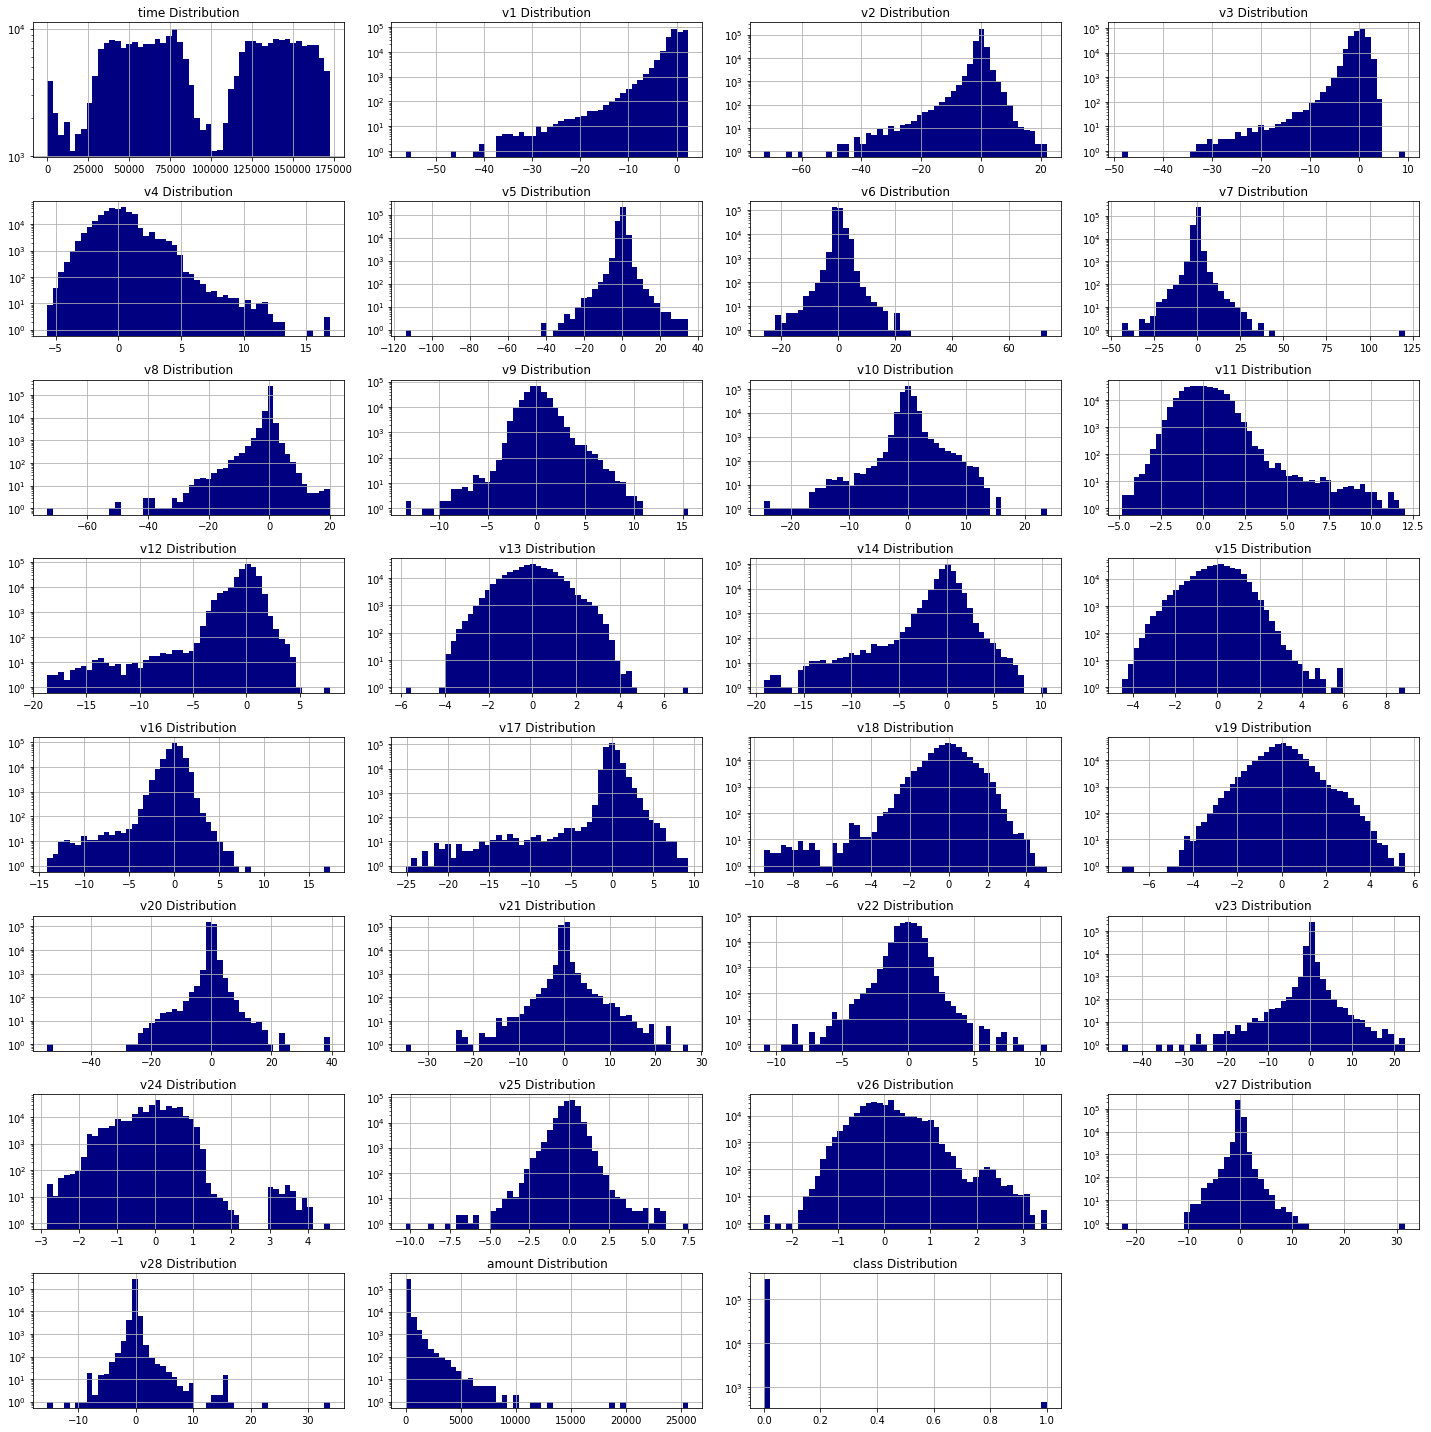

In [17]:
data.plot_histograms(size=20,rows=8,cols=4,num_bins=50,scale='log')

This visualization also provides a more nuanced understanding of the distribution of the predictors. The change to a logarithmic scale better allows us to assess the tails and overall shape of the distribution. Here we can see some of the data are fat tailed while others more resemble a normal distribution. We clearly see the feature "amount" is very fat tailed, however, only a few data points contribute to the huge values observed. This doesn't change the fact that "amount" is still skewing the data.

In [89]:
data.value_breakdown("class")

0    283253
1       473
Name: class, dtype: int64

Target variable has 284807 observations with only 473 instances of fraud. Therefore, we have a skewed data set. This will require metrics other than accuracy such as precision, recall and the F1 score to determine performance. This is true because if our classifier always predicted fraud, it would have an accuracy of 99.8%, which is a high accuracy but misclassifies every instance of fraud, which is the entire point of this project.

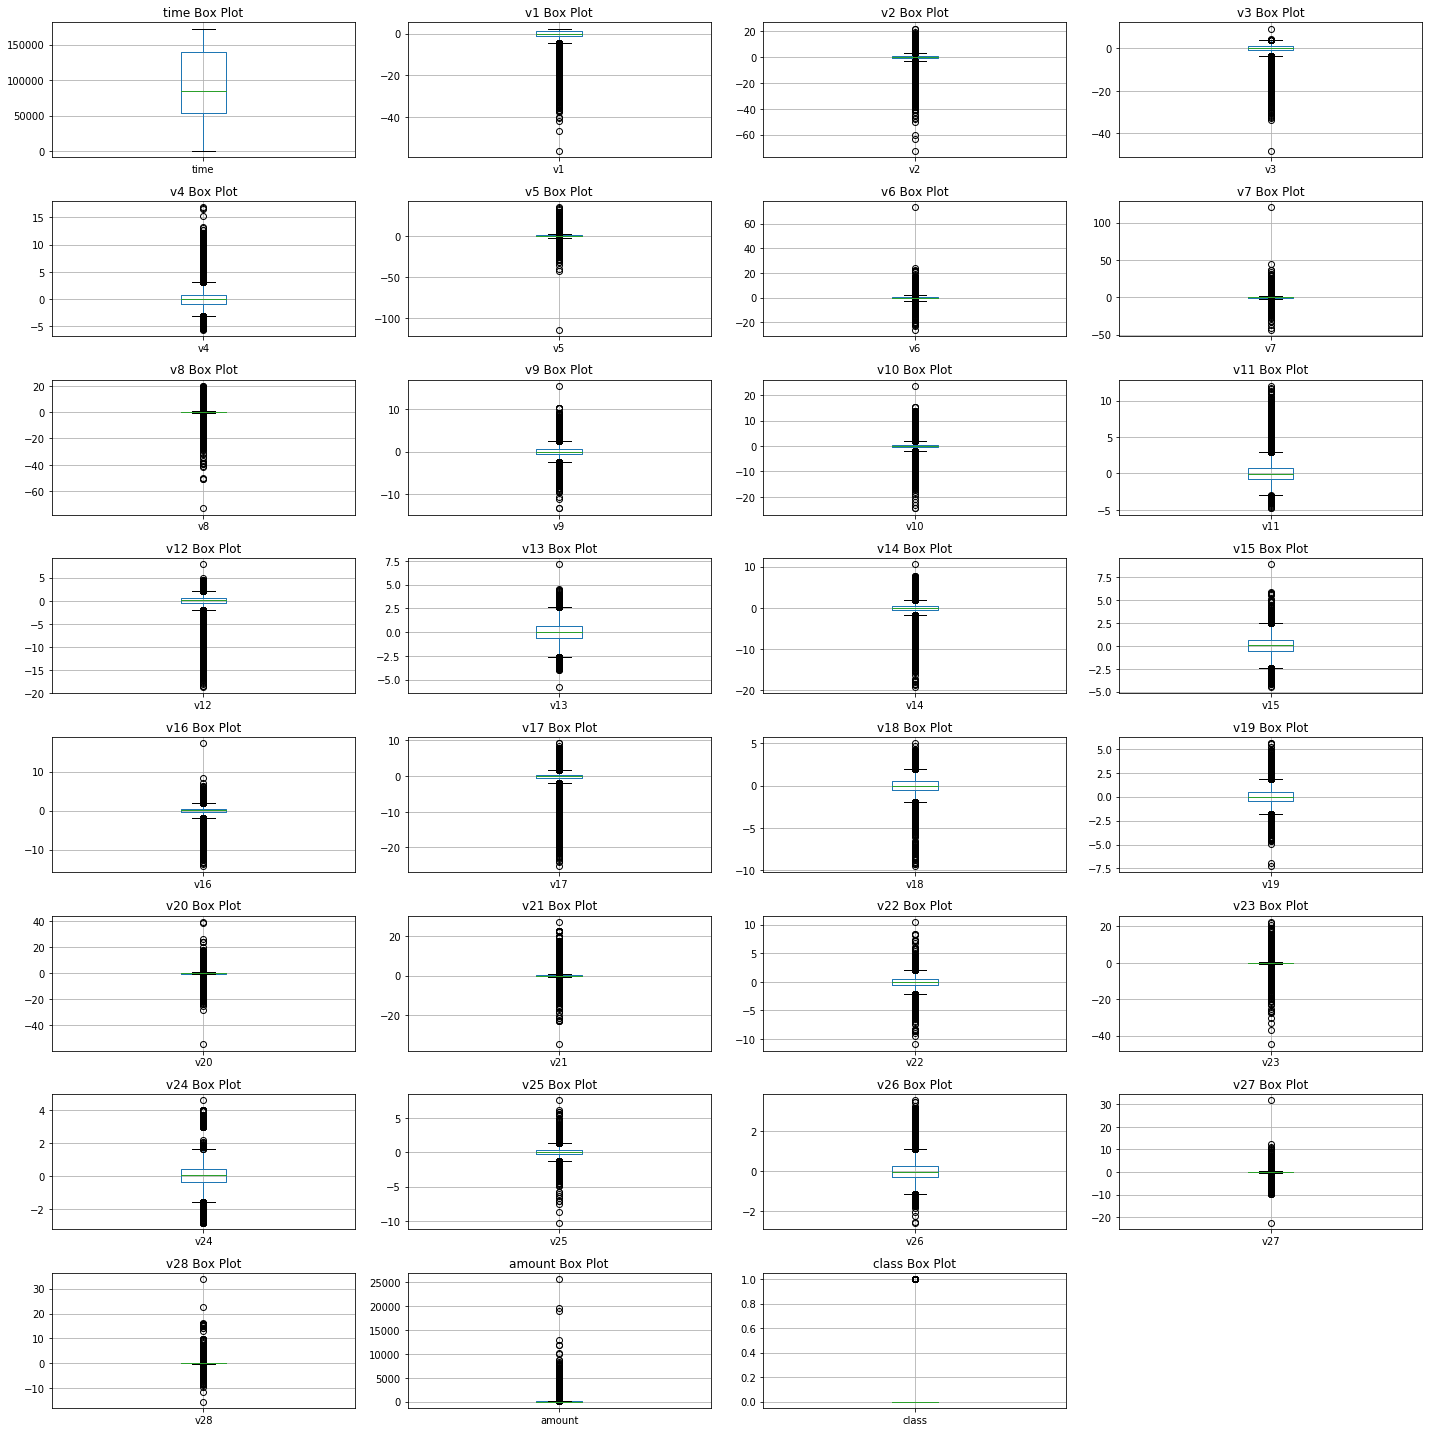

In [20]:
data.plot_boxplots(size=20,rows=8,cols=4)

These graphs provide valuable information about the distribution that was not as apparent from the histograms. These boxplots clearly display the frequency of outliers in the data set. We can see from these box plots that many, if not most of the predictors contain many outliers. This is reinforced upon inspection of the descriptive statistics. Viewing the 25 and 75 percentile and comparing that to the mean and max will also provide smaller snapshot of the outliers in each feature.

In [22]:
data.plot_corr_matrix(corr_type='pearson',precision=5)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
time,1,0.11793,-0.01056,-0.42205,-0.10584,0.17322,-0.06328,0.08534,-0.0382,-0.00786,0.03107,-0.24854,0.1255,-0.06596,-0.10032,-0.18439,0.01129,-0.07382,0.09031,0.02954,-0.05102,0.04591,0.14373,0.05147,-0.01595,-0.23326,-0.04182,-0.00517,-0.0093,-0.01056,-0.01236
v1,0.11793,1,0.00687,-0.00811,0.00226,-0.00704,0.00041,-0.00917,-0.00117,0.00183,0.00082,0.00103,-0.00152,-0.00057,-0.00266,-0.0006,-0.00335,-0.00349,-0.00354,0.00092,-0.00139,0.00282,-0.00144,-0.00133,-0.00072,-0.00022,-0.00068,-0.01571,-0.00486,-0.23011,-0.09449
v2,-0.01056,0.00687,1,0.00528,-0.0015,0.00521,-0.00059,0.00742,0.0029,-0.00027,0.00062,-0.00063,0.00227,0.00068,0.00271,0.00154,0.00401,0.00324,0.00248,-0.00036,-0.00129,-0.0049,0.00124,-0.00385,0.0007,-0.00157,0.00025,0.00755,0.00161,-0.53343,0.08462
v3,-0.42205,-0.00811,0.00528,1,0.00283,-0.00688,-0.00151,-0.01172,-0.00181,-0.00358,-0.00963,0.00234,-0.0059,0.00011,-0.00303,-0.00123,-0.00443,-0.00816,-0.00349,-2e-05,-0.00227,0.0035,-0.00027,0.00045,-7e-05,0.00043,-9e-05,-0.00705,-0.00013,-0.21241,-0.18232
v4,-0.10584,0.00226,-0.0015,0.00283,1,0.00174,-0.00088,0.00466,0.00089,0.00215,0.00275,-0.00122,0.00337,0.00018,0.0028,0.00057,0.00335,0.00366,0.00232,-0.00056,0.00032,-0.00103,0.00012,0.00073,-0.00012,0.00016,0.00078,0.00132,0.00023,0.09951,0.12933
v5,0.17322,-0.00704,0.00521,-0.00688,0.00174,1,-0.00094,-0.00871,0.00143,-0.00121,-0.00605,0.00041,-0.00234,2e-05,-0.001,-0.00117,-0.00237,-0.00447,-0.00269,0.00044,-0.00118,0.00162,-0.00056,0.00118,0.0002,7e-05,0.00039,-0.0058,-0.00082,-0.38769,-0.08781
v6,-0.06328,0.00041,-0.00059,-0.00151,-0.00088,-0.00094,1,0.00044,0.00304,-0.00073,-0.00218,-0.00021,-0.00119,0.0004,0.00018,-0.00047,0.00012,-0.00172,0.00054,0.00011,-0.00018,-0.00213,0.0011,-0.00076,0.0012,0.0007,-3e-05,0.00029,0.00092,0.21639,-0.04392
v7,0.08534,-0.00917,0.00742,-0.01172,0.00466,-0.00871,0.00044,1,-0.00642,-0.00492,-0.01362,0.00245,-0.00615,-0.00017,-0.00382,-0.00139,-0.00594,-0.00879,-0.00428,0.00085,-0.00119,0.00901,-0.00228,0.0033,-0.00038,-7e-05,0.00062,-0.00454,0.00166,0.40041,-0.17235
v8,-0.0382,-0.00117,0.0029,-0.00181,0.00089,0.00143,0.00304,-0.00642,1,0.00104,0.00048,0.00469,-0.00441,-0.00138,-0.00839,0.00104,-0.00438,-0.00558,-0.00132,-0.00063,0.00027,0.01889,-0.00616,0.00499,0.00011,1e-05,-0.00141,0.00061,-0.0001,-0.10466,0.03307
v9,-0.00786,0.00183,-0.00027,-0.00358,0.00215,-0.00121,-0.00073,-0.00492,0.00104,1,-0.01261,-0.00022,-0.00238,0.00075,0.00198,-0.00028,-9e-05,-0.00232,-0.00037,0.00025,-0.00184,0.00068,0.00078,0.00068,-0.0001,-0.00028,0.00125,0.00822,0.00559,-0.04412,-0.09402


These predictors demonstsrate a fair range of correlation to time, amount and class. Considering these are PCA components they are by definition (CHECK THIS) supposed to be uncorrelated with one another. So this makes sense they all demonstrate essentially zero correlation to 3 decimals and is a good sanity check on the integrity of the data. However, we also know this data set contains many outliers. For that reason, we will investigate kendall's tau, or rank correlation.

In [23]:
data.plot_corr_matrix(corr_type='kendall',precision=3)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
time,1,0.128,-0.005,-0.318,-0.096,0.15,-0.074,0.078,-0.069,0.012,0.01,-0.152,0.051,-0.03,-0.062,-0.136,0.001,-0.069,0.061,0.017,-0.08,0.065,0.089,0.1,-0.01,-0.172,-0,-0.023,-0.093,-0.026,-0.01
v1,0.128,1,-0.277,-0.307,0.062,-0.072,-0.062,-0.158,-0.173,0.096,0.169,0.008,0.002,0.032,-0.016,0.018,0.026,-0.038,-0.03,0.023,-0.159,-0.046,-0.021,0.113,-0.001,0.03,0.004,-0.094,-0.217,-0.063,-0.033
v2,-0.005,-0.277,1,0.049,0.107,0.256,-0.077,0.331,-0,-0.074,-0.161,-0.008,0.034,0.02,0.062,0.026,0.046,-0.004,0.011,-0.001,0.038,-0.069,-0.039,-0.069,0.009,-0.054,0.019,0.091,0.096,-0.353,0.04
v3,-0.318,-0.307,0.049,1,0.042,-0.153,0.122,-0.053,0.121,-0.021,-0.05,0.037,-0.034,0.005,-0.094,0.035,-0.031,-0.022,-0.031,-0.011,0.074,-0.024,0.008,-0.096,0.003,0.016,-0.013,0.104,0.142,0,-0.047
v4,-0.096,0.062,0.107,0.042,1,0.01,0.053,0.038,-0.006,0.076,0.027,-0.008,0.103,-0.016,0.067,0.04,-0.032,0.034,0.014,-0.016,-0.01,0.028,-0.001,0.006,-0.005,0.043,-0.038,-0.015,0.009,-0.015,0.05
v5,0.15,-0.072,0.256,-0.153,0.01,1,-0.013,0.336,-0.043,-0.043,-0.11,0.006,-0.034,0.011,0.03,-0.029,-0.006,-0.103,-0.009,0.009,0.041,-0.029,-0.009,-0.076,-0.024,-0.012,0.02,0.006,-0.025,-0.216,-0.023
v6,-0.074,-0.062,-0.077,0.122,0.053,-0.013,1,-0.204,0.347,0.018,0.044,0.035,0.025,-0.002,-0.048,-0.033,-0.011,-0.022,0.04,0.027,0.036,0.025,0.029,-0.036,-0.103,-0.007,-0.015,0.054,0.015,0.141,-0.031
v7,0.078,-0.158,0.331,-0.053,0.038,0.336,-0.204,1,-0.278,-0.076,-0.148,0.002,-0.031,-0.01,0.046,-0.036,-0.085,-0.099,-0.047,0,0.114,-0.015,-0.018,-0.13,-0.008,-0.031,0.009,-0.077,0.04,-0.023,-0.038
v8,-0.069,-0.173,-0,0.121,-0.006,-0.043,0.347,-0.278,1,-0.002,-0.083,0.034,0.07,-0.096,0.027,-0.01,0.063,0.049,0.047,-0.022,0.005,0.056,0.016,0.051,-0.02,-0.051,-0.006,0.145,0.069,0.003,0.019
v9,0.012,0.096,-0.074,-0.021,0.076,-0.043,0.018,-0.076,-0.002,1,-0.206,-0.022,0.079,-0.035,-0.022,-0.001,-0.026,-0.047,-0.008,0.001,-0.017,-0.045,0.001,0.051,-0.001,-0.015,0.024,-0,-0.071,-0.052,-0.039


This affirms my belief that linear correlation is skewed by outliers. This is a particularly interesting case, though, because these outliers serve to understate the correlation among the predictors. For example, the linear correlation between v21 and v22 is zero, but the rank correlation is 0.559. That is a very strong positive correlation. Interestingly, the rank correlation between the time, amount and class and the remaining predictors is generally lower than the linear correlation. Next I will plot this relationship to investigate the skewness of the data.

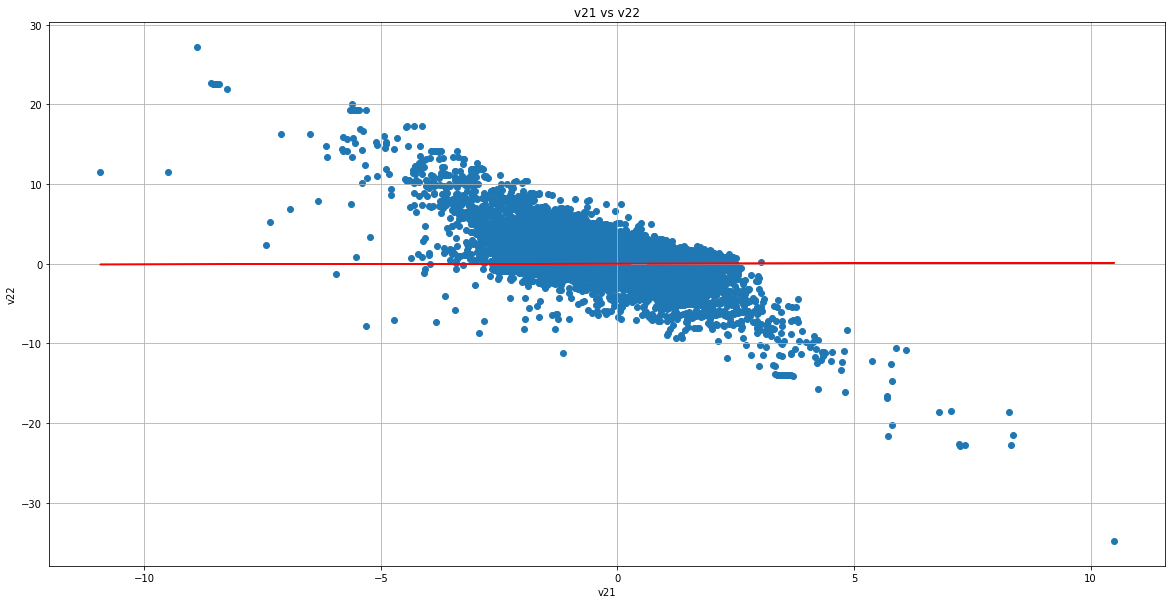

In [24]:
data.scatter_plot(x='v21',y='v22',hx=10,wx=20)

Here we have scatterplot of v21 vs. v22 and line of best fit. This is a particularly surprising graph given we expected to see a positive rank relationship, when the graph appears to demonstrate a negative relationship. We have confidence in this computation of zero linear dependence because it was reached by two different packages, pandas and statsmodels. However, given the number of observations in this scatter plot, this graph is deceiving. This graph does not indicate the true density distribution of the graph. This will be further investigated.

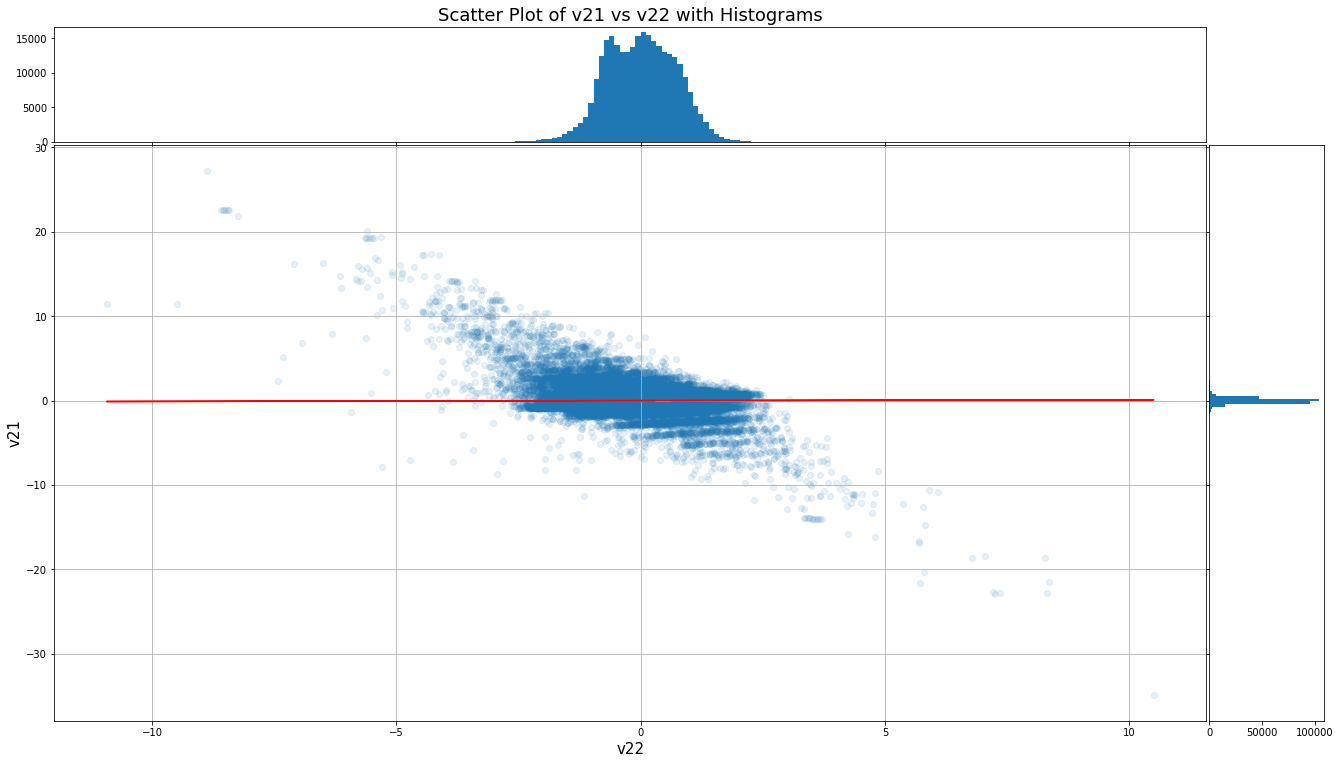

In [25]:
data.scatter_hist(x='v22',y='v21',xLeft=None,xRight=None,yBottom=None,yTop=None,nbins=200)

This graph provides a greater insight as to the sheer density of the data by providing histograms and transparency of the observations. The histograms suggest the data is heavily concentrated in the middle of the graph(especially v21) and the deep blue color found by these data points reinforces this notion. When the linear relationship of data in the heavily concentrated areas are examined, it becomes more plausible that this data does indeed demonstrate zero linear dependence. However, one question is left outstanding: how did these features yield a positive rank relationship? While this graph does provide insight regarding the density of the whole data set, the density distribution of the most dense areas is still relatively opaque. Therefore, I will dig further.

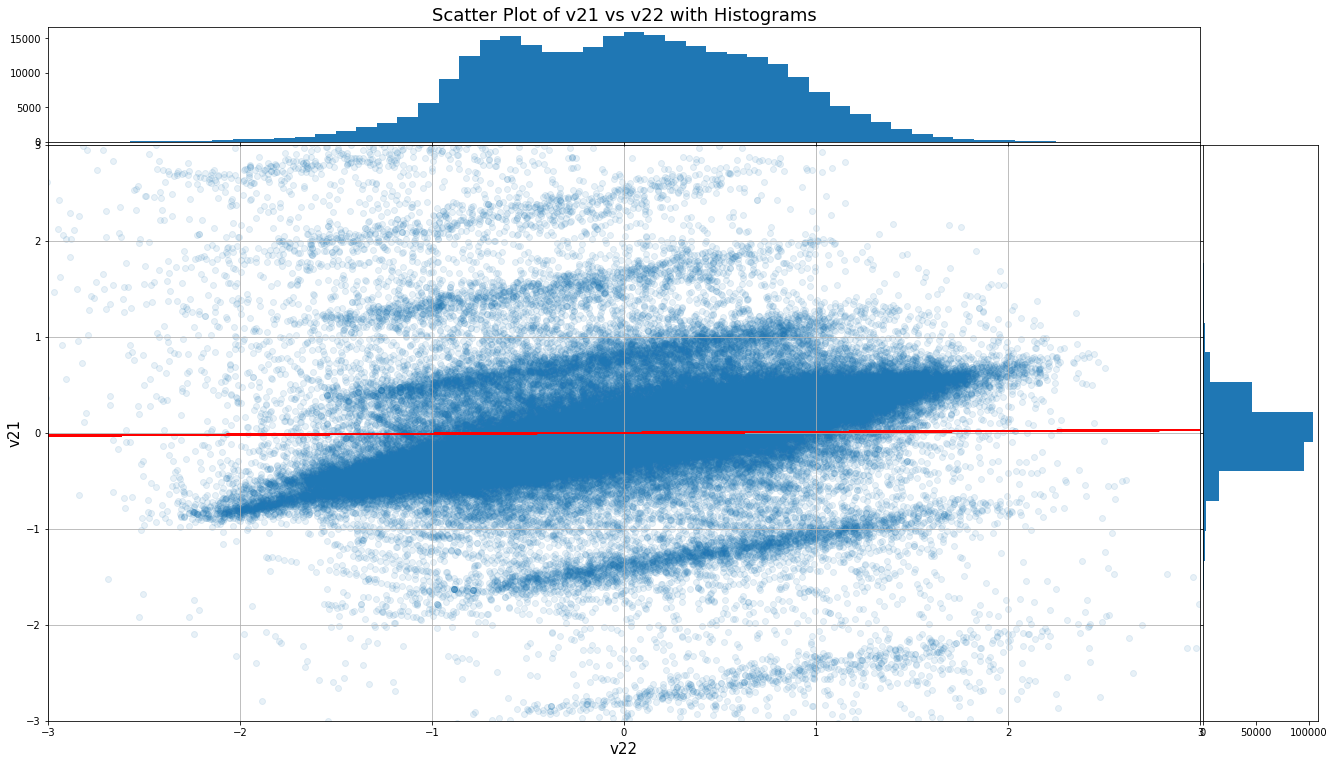

In [27]:
data.scatter_hist(x='v22',y='v21',xLeft=-3,xRight=3,yBottom=-3,yTop=3,nbins=200)

This is the same plot as before, but zoomed in. Zooming in on this concentrated area reveals this "rectangle" of concentrated area is in fact a cluster positively sloped parallel lines. We know rank correlation is less sensitive to outliers, so it makes intuitive sense that positive slope of the heavily concentrated areas ultimately influenced the result of the rank correlation. 

Given these features are principals components of anonymous original features, it isn't realistic to draw any real world insights about these features, however, it is important to keep in mind that linear relationships can be misleading when assessing the true dependency of a set of features. For that reason, I will not investigate the scatterplots of any other pairs of variables.

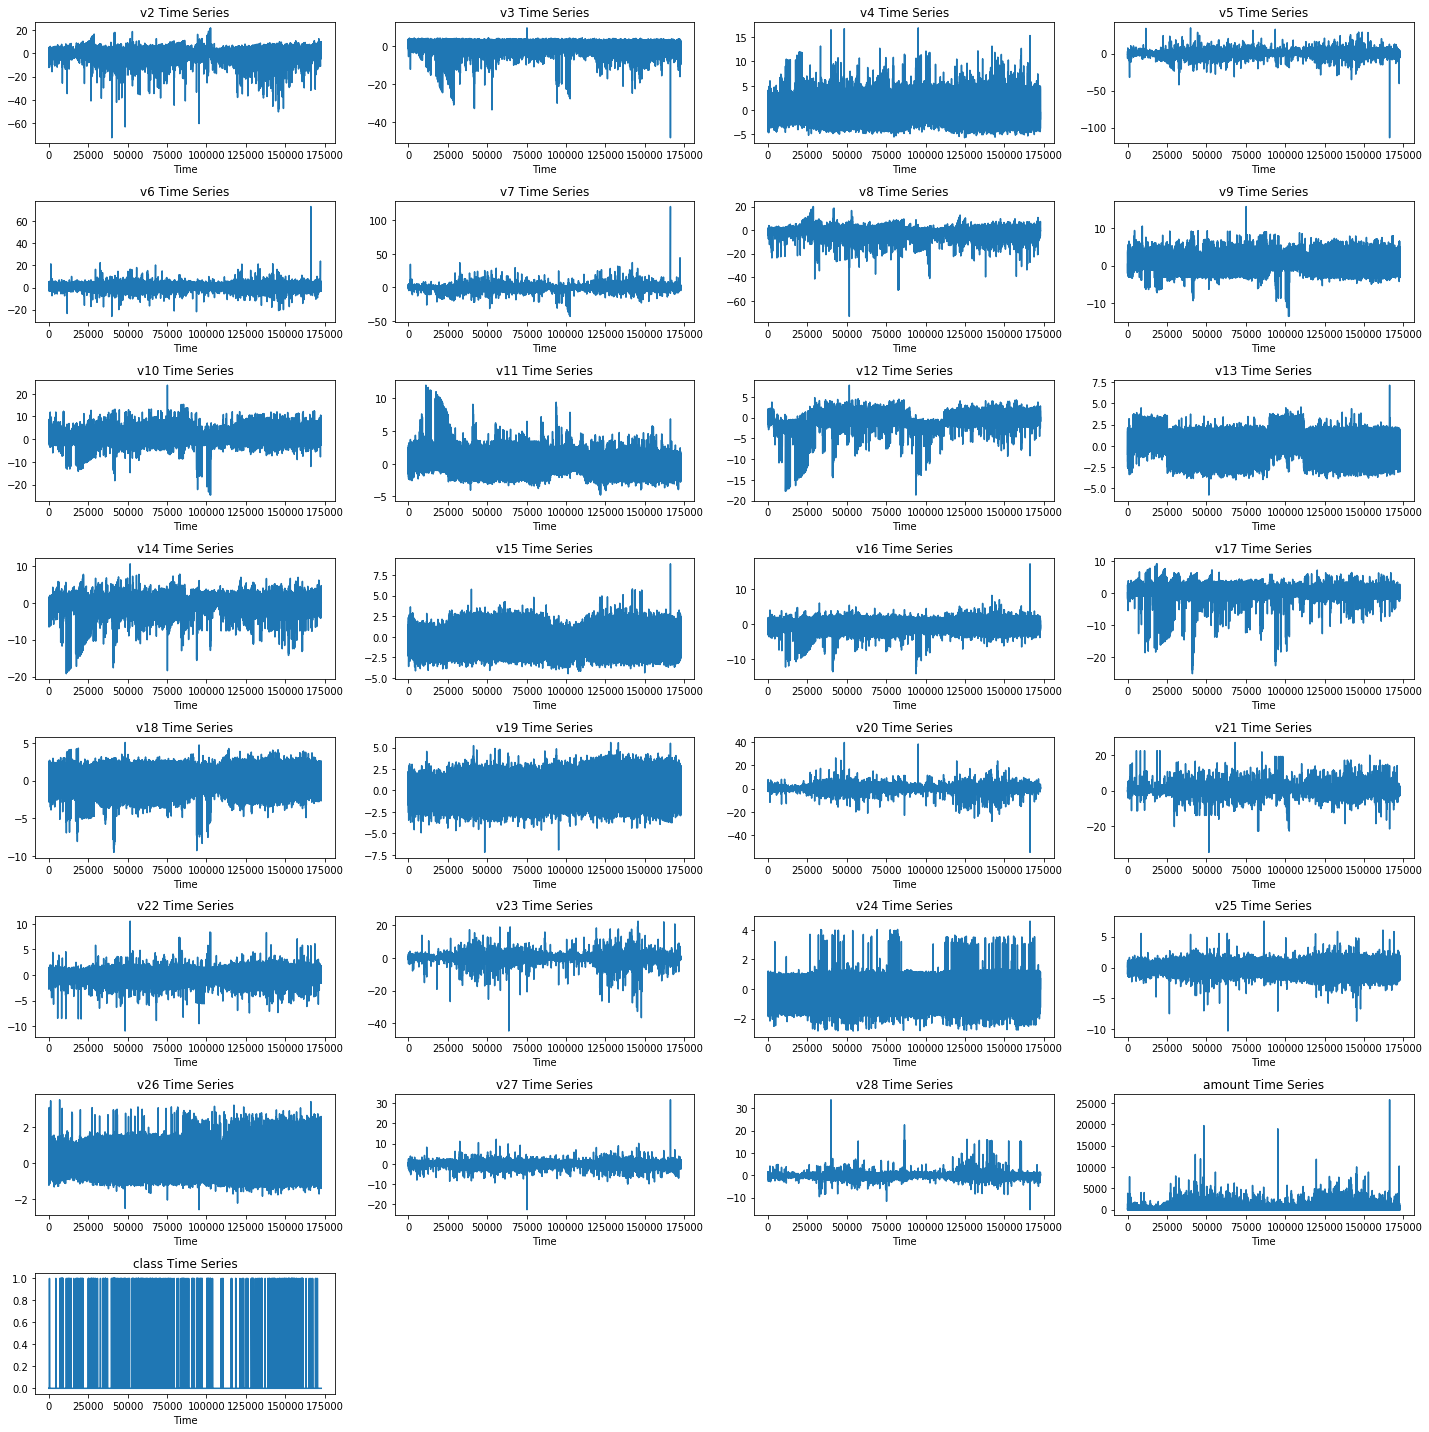

In [23]:
data.time_series_plots()

While this data is stamped with a time, these incidents of transactions are independent (CHECK THIS) therefore, we cannot really derive insight from these time paths. If we were able to follow a specific user then I might be able to extract a pattern from a credit card user trending towards commiting a fraud, however, I do not have information on specific individuals. Additionally, none of these features appear to demonstrate a trend that could be used to conclude broad insights about the state of credit card users in general. This not surprising, however, because these are principal components, not original features.

Main conclusions from the exploratory data analysis:

Features values are skewed by the 'amount' feature. The feature 'amount' will need to be normalized along with time.

Most features include a lot of outliers. Given these are principal components and these outliers seem to consistently create fat tails, I will not consider removing any outliers yet.

Zero linear dependence is confirmed, however, many features have positive or negative rank dependence.

Data is overall well behaved and we don't have to deal with missing data.

## Learning Curve Analysis ##

The first learning curve is constructed using the standard settings for the logistic regression to ascertain whether the default learning algorithm is overfitting or underfitting the data. Note, the features, time and amount are normalized using a standard scaler. The test and validation data set makes up 80% of the total data set.

'Cross Validation Test 100 of 100...'

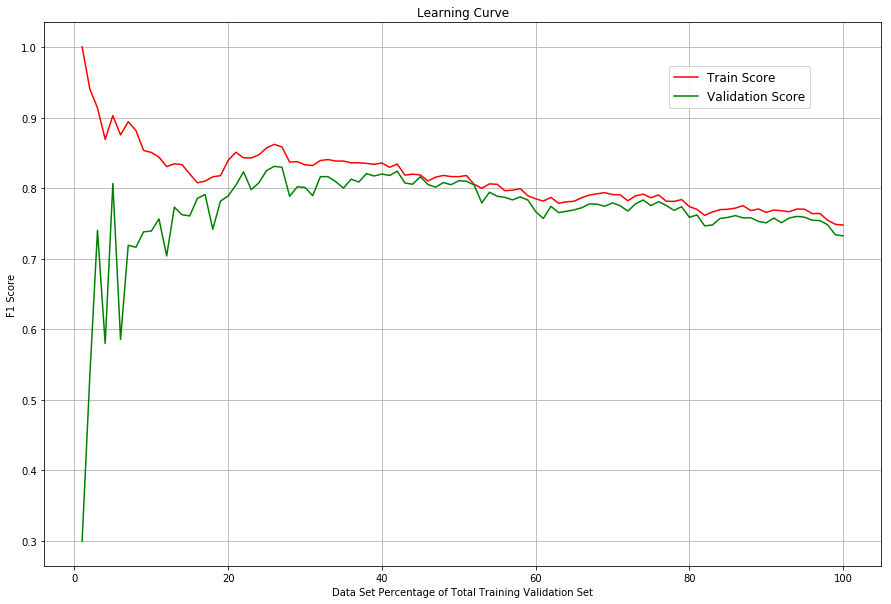

In [15]:
data.format_data(standard=True, robust=False, poly=False, poly_deg=None, test_percent=0.2)
cv_learning_curve(x_data=data.X_trainVal,y_data=data.y_trainVal,folds=10,penalty=1,step=0.01)

'Cross Validation Test 100 of 100...'

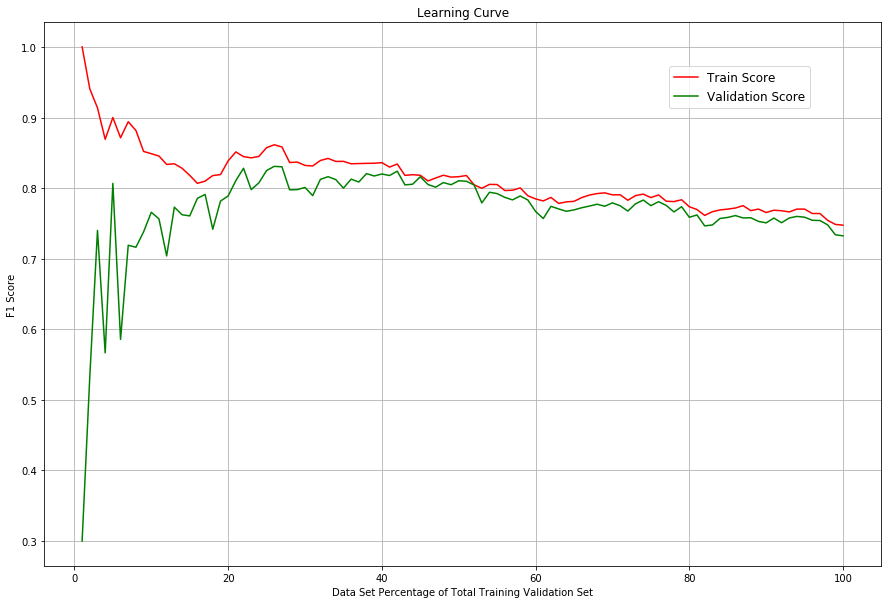

In [4]:
data.format_data(standard=False, robust=True, poly=False, poly_deg=None, test_percent=0.2)
cv_learning_curve(x_data=data.X_trainVal,y_data=data.y_trainVal,folds=10,penalty=1,step=0.01)

It is unclear whether this is a strong enough score, however, we can confidently say this model is not experiencing high variance. If that was the case, we would see a large difference in the training and validation score. Since these scores are very similar, it is possible this algorithm suffers from high bias. In attempt to improve the score I will implement polynomial features. Ideally, I would also add additional features, however, since this data is anonymous, I cannot create intuitive features from the original data. I will also investigate various lambdas, solvers and penalties in attempt to maximize the test score.

In [4]:
data.format_data(standard=True, robust=False, poly=False, poly_deg=None, test_percent=0.2)

p_list = [0.001, 1, 1000]
d_list = [1,2,3]
polynomial_test(x_data=data.X_trainVal, y_data=data.y_trainVal, folds=10, reg_list=p_list, degree_list=d_list)

Polynomial test 9 of 9...


,Polynomial_Degree,Regularize,test_score,train_score
0,1,0.001,0.655251,0.661082
1,2,0.001,0.783730,0.811258
2,3,0.001,0.817259,0.889853
3,1,1.000,0.732370,0.747335
4,2,1.000,0.811762,0.881833
5,3,1.000,0.820701,0.885490
6,1,1000.000,0.731217,0.748228
7,2,1000.000,0.804553,0.881019
8,3,1000.000,0.819224,0.886325


These results affirm the problem of underfitting was correctly assessed. The polynomial of 2 demonstrated a strong performance increase over the original logistic regression. It is also interesting that the polynomial of 3 did not demonstrate a stronger performance over the polynomial of 2. This is a welcome result given dealing with a polynomial of 3 would result in thousands of features which would not be feasible. The disparity of the test and training score suggests this is due to overfitting.

In [13]:
print("This is not surprising given the second degree polynomial has {} features and the third degree polynomial has {} features" \
      .format(pd.DataFrame(PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True).fit_transform(data.X_trainVal)).shape[1], \
              pd.DataFrame(PolynomialFeatures(degree = 3, interaction_only=False, include_bias=True).fit_transform(data.X_trainVal)).shape[1]))

This is not surprising given the second degree polynomial has 496 features and the third degree polynomial has 5456 features


We will confirm this finding with another learning curve.

'Cross Validation Test 100 of 100...'

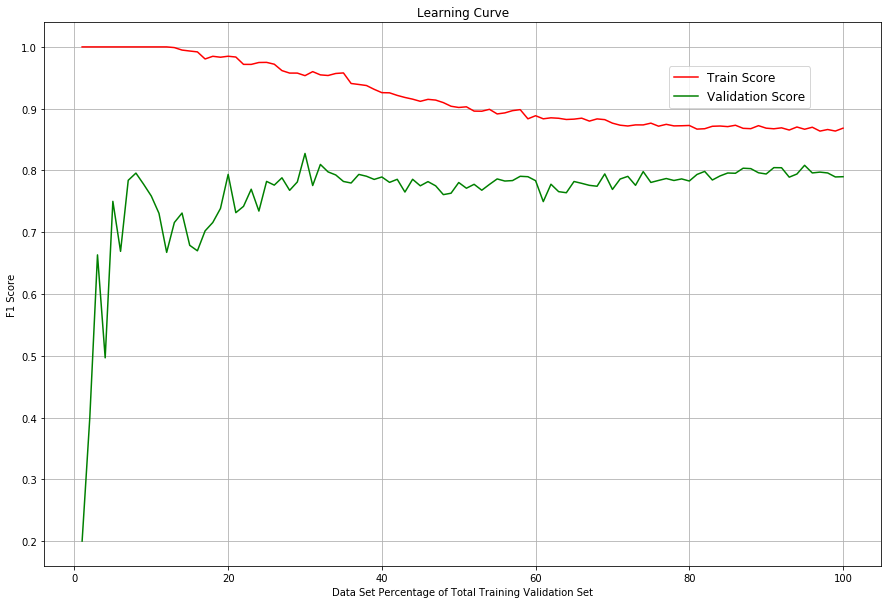

In [21]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)
cv_learning_curve(x_data=data.X_poly_trainVal,y_data=data.y_trainVal,folds=10,penalty=1,step=0.01)

The learning curve demonstrates that the second degree polynomial of the logistic regression is overfitting. This is clear due to the difference between the cross validated training and testing score. There are two primary methods to addressing overfitting: regularization and feature selection. I will first investigate regularization because this functionality is already built in to sklearn.

In [22]:
data.format_data(standard=True, robust=False, poly=False, poly_deg=None, test_percent=0.2)

p_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 , 100]
polynomial_test(x_data=data.X_trainVal, y_data=data.y_trainVal, folds=10, reg_list=p_list, degree_list=[2])

Polynomial test 8 of 8...


,Polynomial_Degree,Regularize,test_score,train_score
0,2,0.00001,0.585538,0.587191
1,2,0.00010,0.683149,0.701320
2,2,0.00100,0.783730,0.811258
3,2,0.01000,0.814854,0.871447
4,2,0.10000,0.813177,0.882995
5,2,1.00000,0.811762,0.881833
6,2,10.00000,0.805831,0.882257
7,2,100.00000,0.810223,0.881614


The first method tested to investigate this overfitting is regularization. Regularization penalizes an algorithm for choosing extreme values as coefficients. The smaller the regularization term, the sharper the penalty. As shown above, regularization term does not have a meaningful impack on performance. The train and test scores are comparable when the penalty is higher, as expected, however, the performance is quite poor. Given regularization did not resolve this issue of overfitting, feature selection will be explored.

## Feature Selection Analysis ## 

There are a number of ways to implement feature selection. In this notebook, six methods are considered:

__1)__ Custom Recursive Scrambling Method

__2)__ Sklearn Mutual Information Selection Method

__3)__ Sklearn Recursive Feature Elemination Cross Validation Method

__4)__ Sklearn Permutation Importance Selection Method

__5)__ Sklearn Importance Weights Selection Method

__6)__ Sklearn Variance Threshold Method

Other feature selection methods such as SelectFwe and SelectFdr because those are focused on minimizing the type I error. Based on the cross validation scores, my learning algorithm would benefit the most from improving its recall. This would be achieved by minimizing the false negative rate which would not be affected by optimizing the type I error.

### Method 1: Custom Recursive Scrambling ###

Method Description:

The purpose of this method is to recursively identify least important feature of the data set and remove it. The least important feature is determined by feature improves the cross validated test score the most when it is removed. Given it would take too much time to retrain the model 496 times for each iteration, the feature being "removed" is simply permutated to nullify its predictive power. Once the least important feature is removed, the method starts over again.

In [40]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)
log_df = feat_select_recursive_scrambling(x_data=data.X_poly_trainVal, y_data=data.y_trainVal, cv_folds=10, runs=50)2

Recursive Scrambling Test 50 of 50...


In [42]:
log_df

,Regularization,Test_Precision,Test_Recall,Test_Score,Train_Precision,Train_Recall,Train_Score,Dropped_Columns,Hypothetical_Score
0,0.01,0.902043,0.736218,0.808649,0.956284,0.800622,0.871509,[265],0.820202
0,0.01,0.915724,0.738654,0.816032,0.958234,0.800056,0.871953,"[265, 346]",0.821190
0,0.01,0.902070,0.741154,0.812292,0.953957,0.799493,0.869903,"[265, 346, 313]",0.822400
0,0.01,0.912146,0.741154,0.815307,0.955124,0.802037,0.871869,"[265, 346, 313, 313]",0.825687
0,0.01,0.909251,0.743654,0.815700,0.954577,0.798083,0.869300,"[265, 346, 313, 313, 130]",0.825909
0,0.01,0.905763,0.741218,0.812863,0.954234,0.798365,0.869342,"[265, 346, 313, 313, 130, 131]",0.823981
0,0.01,0.911326,0.741026,0.815064,0.953316,0.804007,0.872266,"[265, 346, 313, 313, 130, 131, 391]",0.822163
0,0.01,0.902809,0.743846,0.814068,0.958653,0.803157,0.873995,"[265, 346, 313, 313, 130, 131, 391, 344]",0.824409
0,0.01,0.909331,0.748718,0.819092,0.955276,0.800056,0.870709,"[265, 346, 313, 313, 130, 131, 391, 344, 346]",0.824583
0,0.01,0.907153,0.741282,0.813363,0.956239,0.799772,0.870982,"[265, 346, 313, 313, 130, 131, 391, 344, 346, 133]",0.823752


Inspection of the progression of iterations demonstrates this method never increased for more than 3 straight iterations. Similar behavior can be observed from the hypothetical score, which is the CV test scored with the scrambled column, used to determine which column to throw out. This method continued for 50 iterations without meaningful improvement suggesting this method is largely ineffective. However, this method was able to slightly increase performance, with a top test score of 0.821144.

### Method 2: Mutual Information Selection ###

Description of method:

This method investigates the mutual information between the target variable and each feature variable. The mutual information is a non negative value that measures the dependency between the pair of variables. The value is zero if the variables are independent, higher values indicate higher dependency.

This function utilizes a non parametric method based on the entropy estimation from k-nearest neighbors distances.
A link to the documentation page is provided below.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#id5

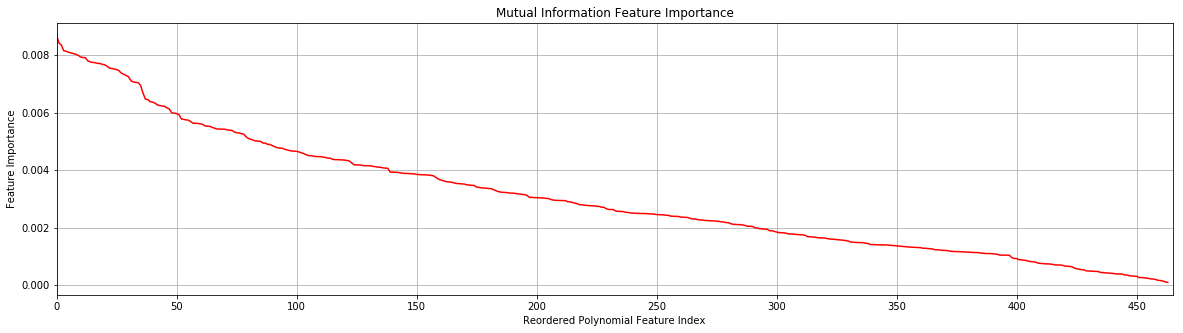

In [33]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)
feat_select_mutual_info(x_data=data.X_poly_trainVal, y_data=data.y_trainVal,fit=False,plot=True)

When this function is fitted, each feature is assigned a mutual information value. The function does not provide a cut off to keep features that meet a certain threshold, therefore, I decided to plot the mutual information value in decreasing order to see if there is a clear drop off anywhere to provide guidance on how many features to keep. 

Unfortunately, there does not appear to be any large drop offs. The largest drop off occurs right around 40. Therefore, I will test a variety of values including 40, denoted in the below list, "drop_list".

In [42]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)

cv_mutual_info(x_data=data.X_poly_trainVal,y_data=data.y_trainVal, cv_folds=10,
               reg_list=[0.001,0.01,0.1,1,10,100,1000],
               drop_list=[40, 100, 200, 300])

Test 28 of 28...


,Drop,Regularization,Test_Precision,Test_Recall,Test_Score,Train_Precision,Train_Recall,Train_Score
0,40.0,0.001,0.910370,0.650128,0.756613,0.939836,0.686968,0.793720
0,100.0,0.001,0.900468,0.642564,0.748269,0.939099,0.686688,0.793286
0,200.0,0.001,0.892379,0.637436,0.741721,0.941660,0.686972,0.794390
0,300.0,0.001,0.898644,0.632372,0.740144,0.938274,0.672870,0.783680
0,40.0,0.010,0.884683,0.733590,0.800240,0.935339,0.779196,0.850017
0,100.0,0.010,0.907193,0.726026,0.804202,0.933272,0.780320,0.849878
0,200.0,0.010,0.898706,0.723654,0.800128,0.947116,0.773274,0.851285
0,300.0,0.010,0.892716,0.705769,0.786475,0.942734,0.751841,0.836498
0,40.0,0.100,0.878802,0.741218,0.799693,0.936584,0.803153,0.864709
0,100.0,0.100,0.874162,0.736026,0.795760,0.936407,0.796674,0.860870


Highest performing test score is 0.804202 where the regularization term is 0.01 and the 100 least important features are dropped. This strategy performs worse than keep the original features, which had a highest test score of 0.814854. This is not entirely surprising since this method is technically supposed to be univariate feature selection method. The predictive power of the features depends on which features are chosen, and analyzing each feature individually neglects the relationship between the set of features chosen. Ideally, a recursive analysis would be done where the set of features where analyzed as a group.

### Method 3: Recursive Feature Elimination Cross Validation ###

Method Description:

This method computes feature importance in a recursive manner. Feature importances are computed for the each feature and these features are scores aggregated through cross validation. Next, the least important feature is removed and this process is repeated until the optimal number of features is identified. RFECV provides rankings for each feature depending on which iteration they were removed. The most important features are assigned a values of 1.

The documentation of the process is provided below.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

In [19]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)
feat_select_RFECV(x_data=data.X_poly_trainVal,y_data=data.y_trainVal,fit=False)

The filtered data set has been reduced to 113 from 496 features


In [23]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)
cv_rfecv(x_data=data.X_poly_trainVal,y_data=data.y_trainVal, cv_folds=10, reg_list=[0.001,0.01,0.1,1,10,100,1000])

Test 7 of 7...


,Regularization,Test_Precision,Test_Recall,Test_Score,Train_Precision,Train_Recall,Train_Score
0,0.001,0.910339,0.614551,0.731888,0.930336,0.639035,0.757592
0,0.010,0.954668,0.761346,0.843781,0.957589,0.765376,0.850637
0,0.100,0.919294,0.779038,0.840922,0.956399,0.814723,0.879831
0,1.000,0.901420,0.776474,0.832358,0.949252,0.820920,0.880367
0,10.000,0.902538,0.786603,0.839340,0.942068,0.818106,0.875637
0,100.000,0.905266,0.776410,0.833922,0.945551,0.822051,0.879448
0,1000.000,0.905234,0.773910,0.832344,0.948261,0.821202,0.880137


This method provides the highest score thus far. It is not a huge surprise that this method performs well because it properly accounts for the fact that the importance of each feature changes when the features contained in the set change. The recursive aspect of this algorithm accounts for the changing feature set by re-evaluating the entire feature set after one feature is removed. Finally, the narrowing of the differential between the train and test score suggests overfitting is being adequately addressed, although, this will have to be confirmed with a learning curve graph.

### Method 4: Select from Model ###

Method Description:

Select from Model selects features based on importance weight. A technical definition of this method is not provided or referenced in the documentation. A threshold can be set, but I have decided not to increase from the default threshold given this method already shrinks the feature set to 168 features. A link to the documentation page is provided below.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [66]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)

feat_select_select_from_model(x_data=data.X_poly_trainVal,y_data=data.y_trainVal,fit=False)

The filtered data set has been reduced to 168 from 496 features


In [40]:
# remove features with zero feature importance
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)

cv_select_from_model(x_data=data.X_poly_trainVal,y_data=data.y_trainVal, cv_folds=10,
               reg_list=[0.001,0.01,0.1,1,10,100,1000])

Test 7 of 7...


,Regularization,Test_Precision,Test_Recall,Test_Score,Train_Precision,Train_Recall,Train_Score
0,0.001,0.895262,0.665321,0.761376,0.923755,0.666667,0.774133
0,0.010,0.911971,0.748782,0.820256,0.956011,0.790188,0.865181
0,0.100,0.893235,0.768974,0.824432,0.948647,0.812747,0.875439
0,1.000,0.890836,0.756282,0.815223,0.941498,0.820080,0.876551
0,10.000,0.882957,0.753718,0.810192,0.940436,0.818669,0.875320
0,100.000,0.886622,0.758782,0.815115,0.937983,0.818949,0.874422
0,1000.000,0.888811,0.763910,0.818996,0.938926,0.818105,0.874307


The strongest performing test score is 0.824432 which occurs for a regularization value of 0.1. This method outperforms the original feature set but underperforms RFECV. Furthermore, we can there is consistently about 5%-6% of score differential between the training set and test set. This suggests the algorithm is still overfitting.

### Method 5: Permutation Importance ###

Method Description:

This method uses a score function to be maximized. First, a baseline score is computed. Next, a feature column is permuted and the score is calculated again. The permutation importance is defined as the difference between the baseline score and the new score. This method is likely to be very similar to the permutation importance method I computed in method 1.

A link to this documentation is defined below.

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance

There a 247 features with zero or negative importance and 249 features with a positive importance.


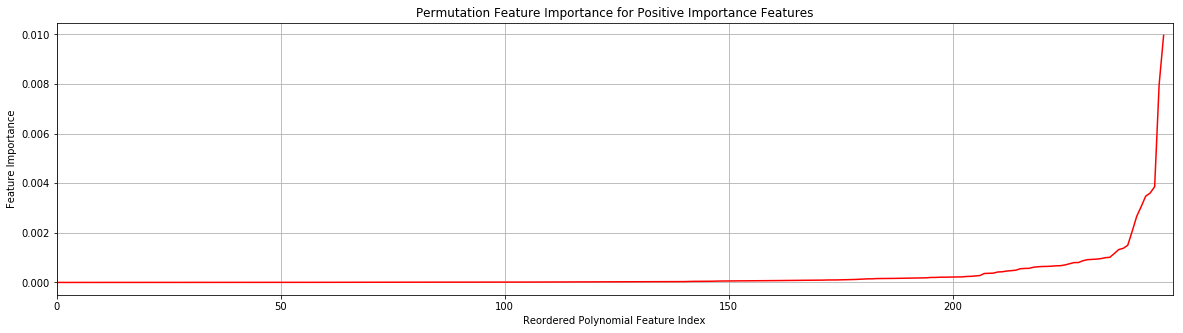

In [125]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)

feat_select_permutation_importance(x_data=data.X_poly_trainVal,y_data=data.y_trainVal,fit=False,plot=True)

Of the 496 original features, 247 have zero or negative feature importance and are removed. The graph above displays the feature importance values of the features which have a non negative feature importance. This graph clearly demonstrates most features have a very small feature importance. First, I will test all 247 features with a non negative feature importance.

In [10]:
# remove features with zero feature importance
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)

cv_permutation_importance(x_data=data.X_poly_trainVal,y_data=data.y_trainVal, cv_folds=10,
               reg_list=[0.001,0.01,0.1,1,10,100,1000],select=1,feat_num_filter=None)

Test 7 of 7...


,Regularization,Test_Precision,Test_Recall,Test_Score,Train_Precision,Train_Recall,Train_Score
0,0.001,0.910564,0.703077,0.792468,0.911898,0.711215,0.798808
0,0.010,0.901019,0.740833,0.811034,0.942037,0.783142,0.855224
0,0.100,0.886706,0.753462,0.812399,0.941250,0.803725,0.867040
0,1.000,0.885755,0.748462,0.808448,0.935394,0.806251,0.865908
0,10.000,0.874090,0.740705,0.798768,0.936682,0.809086,0.868197
0,100.000,0.878616,0.745833,0.804083,0.935975,0.807391,0.866925
0,1000.000,0.882143,0.748333,0.806631,0.933834,0.807389,0.866006


The highest test score of 0.812399 underperforms the original feature set and the highest performing feature selection method, RFECV. It is not a huge surprise we are still seeing what looks like overfitting, given the large feature set of 247 features and the notable difference between train and test score.

Last 80 featues are where the feature importance begins to meaningully improve. Given we still see a large difference between the train and test score, this feature set will be further refined.

In [9]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)

cv_permutation_importance(x_data=data.X_poly_trainVal,y_data=data.y_trainVal, cv_folds=10,
               reg_list=[0.001,0.01,0.1,1,10,100,1000],select=2,feat_num_filter=80)

Test 7 of 7...


,Regularization,Test_Precision,Test_Recall,Test_Score,Train_Precision,Train_Recall,Train_Score
0,0.001,0.908505,0.596667,0.718243,0.916735,0.614507,0.735710
0,0.010,0.891244,0.682692,0.771720,0.915652,0.698522,0.792326
0,0.100,0.885241,0.707821,0.784622,0.909143,0.737164,0.814093
0,1.000,0.856801,0.708013,0.773981,0.906193,0.738298,0.813530
0,10.000,0.868232,0.715513,0.783323,0.913246,0.735477,0.814736
0,100.000,0.847002,0.707949,0.770050,0.906980,0.740550,0.815287
0,1000.000,0.855927,0.710449,0.775230,0.910632,0.733505,0.812438


After further refining the feature set, the test score actually decreases along with the train score. This suggests this method is not capable of identifying a feature set with better predictive power. This is not a huge surprise because, again, this method evaluates the permutation of each feature set individually. Ideally, the least important feature would be removed and this algorithm would be run again. This could be a source of further improvement, although, this method takes roughly 45 minutes to run one iteration which makes this function too computationally expensive to efficiently run a recursive feature elimination method off this criteria.

### Method 6: Variance Threshold ## #

Method Description:

This method does not look at the target variable, it only considers the feature set and removes all low variance features based on the specified threshold. There is no clear rule for the threshold and it is therefore left up to the user.

A link to the documentation of this method is found below.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

Given the threshold is quite arbitrary, I targeted a threshold that would produce roughly the same number of features as RECV, the highest performing algorithm. RECV yielded 113 features, so I chose a threshold of 15 to yield 120 features.

In [55]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)
feat_select_variance_threshold(x_data=data.X_poly_trainVal,y_data=data.y_trainVal,var_thresh=15,fit=True)

The filtered data set has been reduced to 120 from 496 features


In [83]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)
cv_variance_threshold(x_data=data.X_poly_trainVal,y_data=data.y_trainVal, cv_folds=10, reg_list=[0.001,0.01,0.1,1,10,100,1000])

Test 7 of 7...


,Regularization,Test_Precision,Test_Recall,Test_Score,Train_Precision,Train_Recall,Train_Score
0,0.001,0.899845,0.583974,0.706729,0.915202,0.599558,0.724415
0,0.010,0.871002,0.647308,0.741532,0.894322,0.663845,0.761841
0,0.100,0.826406,0.657500,0.730633,0.869728,0.680767,0.763689
0,1.000,0.823233,0.654808,0.726948,0.866939,0.683023,0.763939
0,10.000,0.817794,0.654936,0.724717,0.867829,0.684151,0.765037
0,100.000,0.832085,0.649808,0.727597,0.869084,0.677947,0.761489
0,1000.000,0.820319,0.660000,0.728582,0.861893,0.682182,0.761531


This method performly very poorly; even the train score is not competitive. It is not exactly clear why this is the case, although conducting feature selection without considering the labeled target variable does not seem likely a practical strategy. Given this method can be used for unsupervised learning, it is fair to conclude this is not an optimal strategy for this problem.

### Feature Selection Conclusion ###

The best performing feature selection method is clearly RECV. This is not entirely surprising, given its comprehensive approach. RECV computed a cross validation score after each feature was removed, ensuring the relationship among the features was re-evaluated after the feature set changed. This is the most comprehensive approach that ensure the least important feature was removed after each iteration.

Furthermore, the training score was much closer to the test score for RFECV. This seems to suggest I have adequately addressed the issue of overfitting, but I will confirm this with another learning curve.

'Cross Validation Test 100 of 100...'

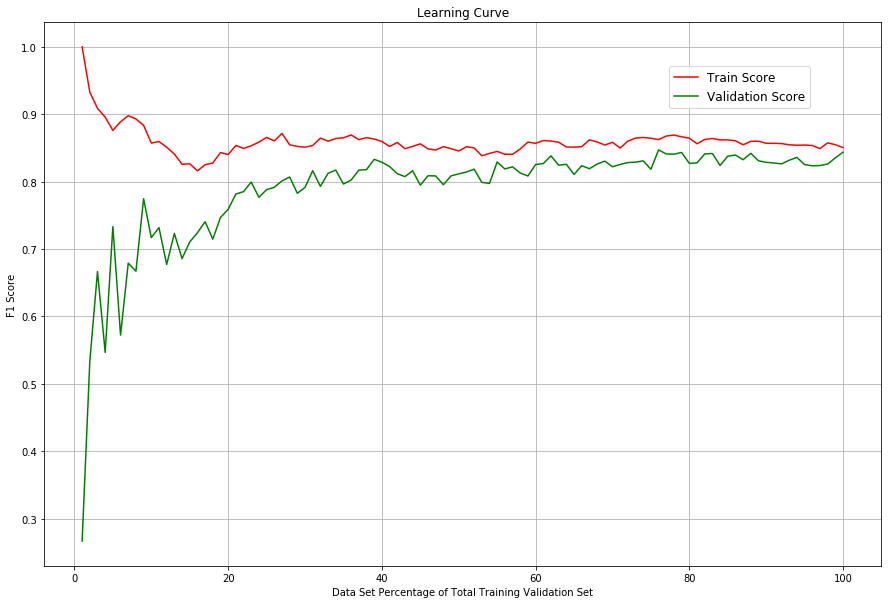

In [25]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)
cv_rfecv_learning_curve(x_data=data.X_poly_trainVal,y_data=data.y_trainVal,folds=10,penalty=0.01,step=0.01)

This learning curve demonstrates a quick and stable convergence between the train and testing score, confirming that the overfitting has been addressed. This graph would typically suggest underfitting, but that would only be the case if we were observing a convergence at a low score, which is not the true here. Therefore, this is a good place to conclude feature selection with confidence that the model has been improved as much as possible.

## Under/Over Sampling Analysis ##

When a data set is clearly imbalanced, undersampling and oversampling is often considered. The purpose of these algorithms are to balance the data set by either removing samples without positive instances of the target variable or by creating synthetic positive instances of the target variable.

First, undersampling is investigated. This method is quite simple in that we keep all the positive instances of fraud and take an equal number of cases of non fraud. However, it is important that this method is applied correctly during cross validation.

This method of undersampling must be applied within each phase of cross validation, not before it. This is primarily because while we will fit the learning algorithm based on the undersampled data, the validation test must be on the original data so that the performance is representative of the actual data set. If the entire data set is undersampled and cross validation is conducted, it makes it much trickier to input a test set of the original data for each phase.

In [76]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)
print(f"The original distribution is {data.y_trainVal.value_counts()[1]/data.y_trainVal.value_counts()[0]}")

The original distribution is 0.0017322412299792043


First, undersampling is explored. I do not want to change the original ratio to much, because this will result in information loss due to throwing out too many data entries, so I will test ratios near the original ratio. Based the best performer precision and recall test scores, the model yields a very high precision score of 0.95, but a lower recall score of 0.76. The purpose of this investigation is to see if I can increase the F1 score by increasing the recall score without sacrificing too much precision performance. Recall is defined as the the number of frauds correctly predicted divided by the total number of frauds. Therefore, I want to bias the algorithm to predict fraud slightly more frequently by increasing the ratio fraud to see if this improves the final F1 score.

In [73]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)
ratios = [0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.010, 0.020, 0.030, 0.040, 0.050]

scores, results = cv_test_resampling(data.X_poly_trainVal,data.y_trainVal,folds=10,regularize=0.01, ratio_list=ratios,method='under')
scores.groupby('Ratio').mean()

Test 13 of 13...


,Regularization,Test_Precision,Test_Recall,Test_Score,Train_Precision,Train_Recall,Train_Score
Ratio,,,,,,,
0.002,0.01,0.898907,0.746282,0.813063,0.961153,0.806825,0.877193
0.003,0.01,0.883764,0.763846,0.816289,0.968844,0.823176,0.890040
0.004,0.01,0.883548,0.758718,0.814095,0.972025,0.830793,0.895839
0.005,0.01,0.845922,0.779231,0.809253,0.975430,0.837563,0.901205
0.006,0.01,0.830711,0.784167,0.804423,0.977196,0.843484,0.905395
0.007,0.01,0.821062,0.784103,0.800505,0.982830,0.851377,0.912334
0.008,0.01,0.798876,0.779038,0.786693,0.981470,0.851942,0.912093
0.009,0.01,0.782454,0.776538,0.776733,0.986329,0.853920,0.915350
0.010,0.01,0.786589,0.776218,0.778382,0.983386,0.848567,0.910984


This method is able to slightly improve performance of the original polynomial data set by changing the ratio of fraud to non-fraud occurences from 0.0017 to 0.0030. Unsurprisingly, the larger ratios yielded a sharp drop in performance due to information loss. Next, I will explore if these ratios can slighly improve upon the best performing feature selection method, RFECV.

In [83]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)

recv_df = pd.read_csv("RECV_Feature_Rank_cv10.csv")
recv_cols_keep = list(recv_df[recv_df['Feature_Ranking'] == 1].index)
X_poly_filter = data.X_poly_trainVal.loc[:,recv_cols_keep]

ratios = [0.0018,0.0019,0.0020, 0.0021, 0.0022, 0.0023, 0.0024,0.0025,0.0030,0.0035,0.004,0.0045,0.0050]

scores, results = cv_test_resampling(X_poly_filter,data.y_trainVal,folds=10,regularize=0.01, ratio_list=ratios,method='under')
scores.groupby('Ratio').mean()

Test 13 of 13...


,Regularization,Test_Precision,Test_Recall,Test_Score,Train_Precision,Train_Recall,Train_Score
Ratio,,,,,,,
0.0018,0.01,0.915815,0.751410,0.824168,0.960864,0.768463,0.853912
0.0019,0.01,0.927718,0.756090,0.830518,0.957309,0.776381,0.857311
0.0020,0.01,0.933158,0.756346,0.832559,0.966737,0.777781,0.861994
0.0021,0.01,0.938025,0.751218,0.831798,0.963183,0.781160,0.862648
0.0022,0.01,0.920930,0.753782,0.827224,0.965591,0.781721,0.863938
0.0023,0.01,0.938366,0.748782,0.830199,0.965060,0.785945,0.866302
0.0024,0.01,0.933226,0.768910,0.841177,0.964144,0.786243,0.866075
0.0025,0.01,0.920868,0.758782,0.830479,0.965904,0.780321,0.863160
0.0030,0.01,0.917951,0.779167,0.841217,0.965254,0.789622,0.868555


Unfortunately, this method is unable to improve upon the best results for RFECV, where the best F1 score was 0.84378 and this undersampling yielded a best score of 0.84121. While the recall increased slighly for the higher ratios, it was at the expense of a stronger decrease in precision. In conclusion, the results of the undersampling investigation were not able to improve upon the existing best performance. This is not particularly suprising, given this method involves throwing out potentially useful data.

Next, I will attempt once more to increase the recall score my increasing the ratio of fraud data points using SMOTE, an oversampling technique. I am slightly more optimistic in this algorithm because this method does not suffer from information loss due to throwing out data entries. The risk is that the synthetic data points created will not accurately capture a real life example of fraud and thus incorrectly train the algorithm.

Addtionally, another downside of the approach is that synthetic examples do not consider the location on the feature space of the majority class, creating the possibility of overlapping classes that would not provide useful information when predicting the minority class.

Next, I will test the oversampling method, Synthetic Minority Oversampling Technique (SMOTE).

In [92]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)
ratios = [0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.010, 0.020, 0.030, 0.040, 0.050]

scores, results = cv_test_resampling(data.X_poly_trainVal,data.y_trainVal,folds=10,regularize=0.01, ratio_list=ratios,method='over')
scores.groupby('Ratio').mean()

Test 13 of 13...


,Regularization,Test_Precision,Test_Recall,Test_Score,Train_Precision,Train_Recall,Train_Score
Ratio,,,,,,,
0.002,0.01,0.905637,0.743654,0.814293,0.961942,0.808313,0.878430
0.003,0.01,0.889575,0.758846,0.816166,0.963099,0.815635,0.883228
0.004,0.01,0.890730,0.753782,0.814831,0.971654,0.824450,0.891967
0.005,0.01,0.872308,0.766410,0.813995,0.971231,0.828152,0.893966
0.006,0.01,0.867815,0.766538,0.811430,0.975173,0.834691,0.899448
0.007,0.01,0.851201,0.769167,0.805193,0.975316,0.840642,0.902948
0.008,0.01,0.837216,0.774167,0.801593,0.977225,0.849114,0.908650
0.009,0.01,0.816354,0.774167,0.792289,0.977187,0.850869,0.909635
0.010,0.01,0.814689,0.776603,0.792247,0.977233,0.862872,0.916482


The best performing method still outperforms the original data set, however, it underperforms the undersampling method. This suggests that the information loss from undersampling is less negative than the potential for incorrect information being introduced through synthetic data created from the oversampling method, SMOTE. I will also introduce the parameter of number of clusters because clustering is used to generate these synthetic data points.

In [3]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)
recv_df = pd.read_csv("RECV_Feature_Rank_cv10.csv")
recv_cols_keep = list(recv_df[recv_df['Feature_Ranking'] == 1].index)
X_poly_filter = data.X_poly_trainVal.loc[:,recv_cols_keep]
ratios = list(np.arange(0.0030,0.0105,0.0005))
c_list = [3, 4, 5 , 6, 7, 8, 9, 10]

scores_sm, results = cv_test_oversampling(X_poly_filter,data.y_trainVal,folds=10,regularize=0.01, ratio_list=ratios,cluster_list=c_list)

Over sampling test 120 of 120...


In [15]:
scores_format = scores_sm.groupby(['Clusters','Ratio']).mean()
scores_format.sort_values(by='Test_Score',ascending=False).head(10)

Regularization  Test_Precision  Test_Recall  Test_Score  \
Clusters Ratio                                                             
5        0.0055            0.01        0.920906     0.794295    0.851557   
         0.0050            0.01        0.918459     0.794295    0.850385   
         0.0035            0.01        0.931283     0.784103    0.850195   
3        0.0065            0.01        0.905428     0.804487    0.849784   
4        0.0050            0.01        0.926313     0.786603    0.849199   
5        0.0045            0.01        0.926655     0.786603    0.848852   
7        0.0075            0.01        0.909273     0.799359    0.848776   
         0.0055            0.01        0.913679     0.791667    0.846482   
8        0.0040            0.01        0.907917     0.794295    0.845953   
7        0.0065            0.01        0.907684     0.794231    0.845784   

                 Train_Precision  Train_Recall  Train_Score  
Clusters Ratio                                               
5        0.0055         0.979109      0.820267     0.892649  
         0.0050         0.978668      0.816129     0.890025  
         0.0035         0.972529      0.810196     0.883940  
3        0.0065         0.979918      0.832406     0.900127  
4        0.0050         0.977608      0.832454     0.899180  
5        0.0045         0.976141      0.812704     0.886932  
7        0.0075         0.979321      0.832964     0.900208  
         0.0055         0.976689      0.825244     0.894564  
8        0.0040         0.972796      0.803912     0.880280  
7        0.0065         0.978074      0.831128     0.898619

These results outperform the best performing original data with feature selection. Based on these results, 5 clusters is the optimal number of clusters and the optimal ratio likely occurs between 0.0030 and 0.0060, so I will narrow my search within those specifications to find the optimal value.

In [4]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)
recv_df = pd.read_csv("RECV_Feature_Rank_cv10.csv")
recv_cols_keep = list(recv_df[recv_df['Feature_Ranking'] == 1].index)
X_poly_filter = data.X_poly_trainVal.loc[:,recv_cols_keep]
ratios = list(np.arange(0.0030,0.00601,0.0001))
c_list = [5]

scores_sm2, results = cv_test_oversampling(X_poly_filter,data.y_trainVal,folds=10,regularize=0.01, ratio_list=ratios,cluster_list=c_list)

Over sampling test 31 of 31...


In [5]:
scores_sm2.groupby('Ratio').mean().sort_values(by='Test_Score',ascending=False).head()

,Clusters,Regularization,Test_Precision,Test_Recall,Test_Score,Train_Precision,Train_Recall,Train_Score
Ratio,,,,,,,,
0.0037,5,0.01,0.934434,0.789167,0.854535,0.976113,0.814399,0.887932
0.0057,5,0.01,0.920440,0.799359,0.853619,0.977825,0.824185,0.894442
0.0059,5,0.01,0.916006,0.801859,0.853059,0.980072,0.822867,0.894592
0.0058,5,0.01,0.912193,0.801795,0.851956,0.978081,0.826706,0.895985
0.0055,5,0.01,0.920906,0.794295,0.851557,0.979109,0.820267,0.892649


Searching within more granular ratio has yielded an optimal ratio that has further improved performance. This combination is 5 clusters with an oversampling ratio of 0.0037, yielding a 10 fold Cross Validation F1 score of 0.854535. This ratio in the 0.0030 range is preferable to the ratio in the 0.0050 range because it creates less synthetic samples, therefore decreasing the opportunities to create samples that provide incorrect information. In conclusion, the training score was able to be slightly improved by increasing the recall from roughly 0.76 to 0.789 while sacrificing a bit of the precision score.

While I report the mean hold out score for the 10 fold cross validation, it is important to know how stable that score is compared to the 10 individual scores from which this mean is computed. For example, if a strong mean score is composed of a few very high scores and a few very low scores, I would consider this iteration to be less reliable. For that reason, I will append this dataframe with the standard deviation of scores for each iteration.

In [8]:
variance = []

for ratio in scores_sm2['Ratio'].unique():
    df = scores_sm2[scores_sm2['Ratio'] == ratio]
    variance.append({'Ratio':ratio, 'Test_Score_Std':df['Test_Score'].std()})
    
var_df = pd.DataFrame(variance)

reformat_df = scores_sm2.groupby('Ratio').mean()
reformat_df['Test_Score_Std'] = list(var_df['Test_Score_Std'])
reformat_df.sort_values(by='Test_Score_Std',ascending=True)

,Clusters,Regularization,Test_Precision,Test_Recall,Test_Score,Train_Precision,Train_Recall,Train_Score,Test_Score_Std
Ratio,,,,,,,,,
0.0059,5,0.01,0.916006,0.801859,0.853059,0.980072,0.822867,0.894592,0.035907
0.0060,5,0.01,0.896987,0.801795,0.844681,0.979167,0.823208,0.894410,0.037403
0.0037,5,0.01,0.934434,0.789167,0.854535,0.976113,0.814399,0.887932,0.037459
0.0053,5,0.01,0.916871,0.794103,0.849359,0.976337,0.821218,0.892060,0.040393
0.0054,5,0.01,0.917153,0.794231,0.849329,0.978779,0.817738,0.891020,0.041813
0.0051,5,0.01,0.919771,0.786538,0.845726,0.976177,0.816075,0.888951,0.043758
0.0052,5,0.01,0.903071,0.791667,0.842410,0.977775,0.814098,0.888443,0.043888
0.0045,5,0.01,0.926655,0.786603,0.848852,0.976141,0.812704,0.886932,0.043988
0.0042,5,0.01,0.925827,0.781538,0.846009,0.976739,0.810594,0.885911,0.044174


Based on the updated dataframe, we can see the highest mean score for the ratio of 0.0037 yields the third lowest standard deviation, providing further confidence in this model. Finally, I will conduct the out of sample test based on the following modifications. First, I increased the feature set by transforming to the features to a polynomial set with a power of 2. Next, I conducted feature selection using the Recursive Feature Elimination Cross Validation method. Finally, I oversampled the data to improve the recall score and the overall F1 score.

The out of sample test is conducted as follows, train the model using the polynomial features with feature selection and oversampling on the training data set (80% of all the data). Next, using the unseen data which is 20% of the total data set, use the trained model to predict the number of credit card frauds.

## Out of Sample Test ##

In [22]:
data.format_data(standard=True, robust=False, poly=True, poly_deg=2, test_percent=0.2)
recv_df = pd.read_csv("RECV_Feature_Rank_cv10.csv")
recv_cols_keep = list(recv_df[recv_df['Feature_Ranking'] == 1].index)

X_poly_filter_train = data.X_poly_trainVal.loc[:,recv_cols_keep]
X_poly_filter_test = data.X_poly_test.loc[:,recv_cols_keep]

scores_final, results,confusion_mat = oos_test(X_poly_filter_train,data.y_trainVal,X_poly_filter_test,data.y_test,folds=10,regularize=0.01, ratio=0.0037, clusters=5)

In [5]:
scores_final

,Clusters,Penalty,Ratio,Regularization,Test_Precision,Test_Recall,Test_Score,Train_Precision,Train_Recall,Train_Score
0,5,l2,0.0037,0.01,0.806122,0.806122,0.806122,0.973277,0.82283,0.891753


In [6]:
pd.DataFrame(confusion_mat)

,0,1
0,56845,19
1,19,79


First and foremost, these are dissapointing results. The test score for the training set yielded a peak of 0.854535 while the out of sample test only scored 0.806122. It is surprising that Precision and Recall are exactly the same, however, this results can be confirmed by consulting the confusion matrix. As shown in this matrix, the False Positive and False Negative both are 19, which guarentees the Precision and Recall will be identical. It appears this model suffers from overfitting, although optimized test score was computed from cross validation and the test and train score from the training set are only 0.04 apart.

## Conclusion & Future Work ##

The purpose of this investigation was to use logistic regression to predict credit card fraudulent charges. One key aspect of this dataset was the fact that it was anonymised via PCA and was normalized prior to PCA. This took care of normalizing the features, however, time and the charge amount had not been normalized so they were also normalized. It is important to note that PCA still created outlier values according to the box plots and dealing with these outlier values could be a source of future work.

Next, correlation and scatter plots were explored. While this wasn't critical to the analysis, it highlighted an important point that basic scatter plots can be deceiving when visualizing large datas. While the linear correlation of feature 21 and 22 was 0, the kendall's tau was 0.556 and the scatter plot seemed to suggest a negative correlation. Once histograms and transparency were added to the data points on the scatter plot, it became clear there was a large density imbalance in the plot. Zooming in revealed the highest density parts of the graph demonstrated a positive relationship, consistent with Kendall's tau and our expectation of the rank correlation that it is less sensitive to outliers.

The learning curve of the logistic regression was examined after finishing the exploratory data analysis. The learning curve demonstrated very similar performance between the test and training set, suggesting the model underfit the data. In order to address this underfitting, I could create additional features using intuition of the data or via polynomial transformation. Given this data was anonymized, intuitively creating new features was not possible, so I pursued polynomial transformation. Therefore, I retested the data with a power of two and three polynomial. I observed stronger performance in a cross validation test than the original data. The power of three polynomial slightly outperformed the power of two polynomial, but not enough to consider using the power of three polynomial. Plus, the power of three polynomial had roughly 4500 features which made this did dataset likley infeasible to test and manipulate. The power of two polynomial yielded a learning curve where the training and test set had a meaningful difference in performance, suggesting an overfitting of the data. I had two options to deal with overfitting, regularization or feature selection.

Since this overfitting did not occur until I created additional features, I was skeptical of regularization, but this was relatively easy to test. As expected, regularization did not improve performance, so then I pursued feature selection. I used various packages provided by sklearn to conduct feature selection. The top performing method, RFECV, increased the CV test score from about 0.81 to 0.84. The learning curve demonstrated a closer performance between the test and train scores, suggesting the overfitting had been addressed.

Comparison of the Precision and Recall scores demonstrated that the precision score was very high (about 0.95) and the recall score was much lower at 0.76. Therefore, I decided to see if biasing the data set via undersampling or oversampling could cause an increase in the recall without sacrificing too much of the precision score to ultimately increase the F1 Score. Undersampling did not improve the performance, however, oversampling via SMOTE yielded an increased test score of 0.8545. 

Finally, the out of sample test was conducted on the 20% of data set which was unseen thus far. The out of sample test yielded an F1 score of 0.806, a dissapointing 0.048 points less than the optimized test score from the training data set. This seems to suggest the model was overfitted on the training set. While the model was assessed based on the hold out part of the training set from 10 fold cross validation, it is still possible that model was overtested on the data set. Exploring rules and methodologies to prevent overtesting is another area of future work.

Other areas of future work include conducting recursive feature elimination cross validation on the sklearn method of "select from model" to see if it outperforms the RFECV. This test would likely take a few days to complete. Additionally, other methods of oversampling could be explored such as adaptive synthetic sampling a method similar to SMOTE. Modifying the threshold for prediction in the logistic regression model could also be explored, but this is unlikely to improve performance as it is a blunt tool. Finally, other models such as random forest or neural networks could be explored to improve model performance. Those models were not explored here because there were not defined within the scope of the exploration.